In [1]:
import turtle as t
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import to_networkx
from BongardDataset import BongardDataset
import plotly.graph_objects as go
from pyvis.network import Network
from tqdm import tqdm
from IPython.core.display import display, HTML
import wandb
import copy
from pyvis.network import Network
import torch 


/var/folders/9q/lx6l777n2r74fbdg4g7ckqn40000gn/T/ipykernel_28167/1959358211.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [12]:
def vis_graph(graph):
    G = to_networkx(graph)
    pos = nx.spring_layout(G)
    #pos = nx.layout.spectral_layout(G)
    #pos = nx.layout.planar_layout(G)
    #pos = nx.spring_layout(G,pos=pos)

    frame = [[0],[0,0,0,0], [0,0,0,0,0],[0,0,0,0,0,0]]
    square = [[1],[1,0,0,0], [1,0,0,0,0],[1,0,0,0,0,0]]
    circle = [[2],[0,1,0,0], [0,1,0,0,0],[0,1,0,0,0,0]]
    triangle_up = [[3],[0,0,1,0], [0,0,1,0,0],[0,0,1,0,0,0]]
    triangle_down = [[4],[0,0,0,1], [0,0,0,1,0],[0,0,0,1,0,0]]
    in_shape = [[5],[0,0,0,0,1],[0,0,0,0,1,0]]
    part_of = [[0,0,0,0,0,1]]
    
    # create some shadow
    pos_shadow = copy.deepcopy(pos)
    shift_amount = 0.006
    for idx in pos_shadow:
        pos_shadow[idx][0] += shift_amount
        pos_shadow[idx][1] -= shift_amount
    
    pos_labels  = copy.deepcopy(pos)
    shift_amount = 0.05
    for idx in pos_labels:
        pos_labels[idx][0] += shift_amount

    labels = {}
    for i in G.nodes:
        if graph.x[i].tolist() in frame:
            labels[i] = f"Frame"
        elif graph.x[i].tolist() in square:
            labels[i] = f"Square"
        elif graph.x[i].tolist() in circle:
            labels[i] = f"Circle"
        elif graph.x[i].tolist() in triangle_up:
            labels[i] = f"Triangle Up"
        elif graph.x[i].tolist() in triangle_down:
            labels[i] = f"Triangle Down"
        elif graph.x[i].tolist() in in_shape:
            labels[i] = f"In"
        elif graph.x[i].tolist() in part_of:
            labels[i] = f"Part Of"
        
    fig = plt.figure(frameon=True, figsize=(3,2))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')


    nx.draw_networkx_nodes(G,pos_shadow,node_size=500, node_color="black", alpha=0.5)
    nx.draw_networkx_nodes(G,pos,node_size=500,node_color="#3182bd", linewidths=1)
    nx.draw_networkx_labels(G,pos_labels,labels,font_size=8)
    nx.draw_networkx_edges(G,pos,arrows=False)

frame = [[0],[0,0,0,0], [0,0,0,0,0]]
square = [[1],[1,0,0,0], [1,0,0,0,0]]
circle = [[2],[0,1,0,0], [0,1,0,0,0]]
triangle_up = [[3],[0,0,1,0], [0,0,1,0,0]]
triangle_down = [[4],[0,0,0,1], [0,0,0,1,0]]
in_shape = [[5],[0,0,0,0,1]]

def get_label(row):
    if row.tolist() in frame:
        return f"Frame"
    elif row.tolist() in square:
        return f"Square"
    elif row.tolist() in circle:
        return f"Circle"
    elif row.tolist() in triangle_up:
        return f"Triangle Up"
    elif row.tolist() in triangle_down:
        return f"Triangle Down"
    elif row.tolist() in in_shape:
        return f"In"
    else:
        return None

def is_frame(row):
    if row.tolist() in frame:
        return True
    else:
        return False

In [4]:
# visualize the bongard problem
import graphviz
dot = graphviz.Digraph(comment='Bongard puzzle')
shapes = {'square': 'box', 'circle': 'circle', 'triangle': 'triangle'}
for shape, graphviz_shape in shapes.items():
    dot.node(shape, shape, shape=graphviz_shape)

dot.view()


'Digraph.gv.pdf'

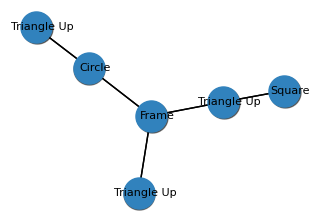

In [5]:
### First representation
dataset_name = "HotIn"
dataset = BongardDataset(root=dataset_name)
graph = dataset[0]
vis_graph(graph)


net = Network

for j in range(len(dataset)):
    graph = dataset[j]
    net = Network(height="1000pt", width="1000pt", bgcolor="#FFFFFF", font_color="41424C",)
    for i in graph.edge_index.T:
        src = i[0].item()
        dst = i[1].item()

        net.add_node(src, label=get_label(graph.x[src]),color="#0082A4")
        net.add_node(dst, label=get_label(graph.x[dst]),color="#0082A4")

        net.add_edge(src, dst)
    #net.toggle_physics(False)
    #net.toggle_stabilization(False)
    net.save_graph(f"{dataset_name}/Vis/{j}.html")
    
#net.show_buttons(filter_=['physics'])
    

In [6]:
# log the visualizations to wandb

# for i in range(len(dataset)):
#     wandb.init(project="Bongard Dataset", tags=["representation"])
#     wandb.log({"graph": wandb.Html(f"{dataset_name}/Vis/{i}.html")})
#     wandb.finish()


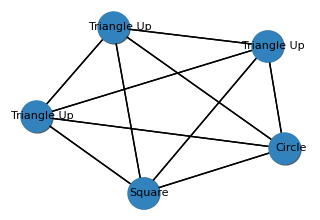

In [7]:
### Second representation
dataset = BongardDataset(root='HotEdgesFull')
graph = dataset[0]
vis_graph(graph)


tensor([[0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 1, 0]])
tensor(True)


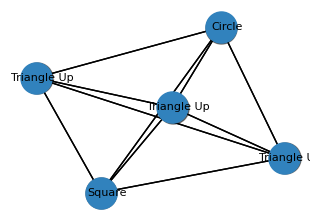

In [8]:
### Third representation
dataset = BongardDataset(root='HotEdgesFull')
graph = dataset[0]
vis_graph(graph)
print(graph.x)
print(torch.any(graph.edge_attr))

tensor([[3],
        [3],
        [2],
        [1],
        [3]])
tensor(True)


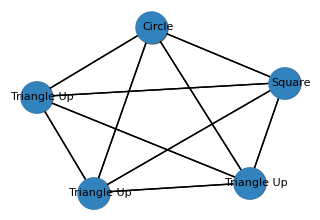

In [9]:
### Fourth representation
dataset = BongardDataset(root='ValEdgesFull')
graph = dataset[0]
vis_graph(graph)
print(graph.x)
print(torch.any(graph.edge_attr))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])
tensor(False)


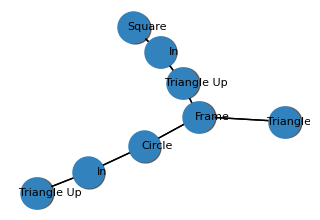

In [10]:
### Fifth representation
dataset = BongardDataset(root='HotKlog')
graph = dataset[0]
vis_graph(graph)
print(graph.x)
print(torch.any(graph.edge_attr))

tensor([[0],
        [3],
        [3],
        [2],
        [1],
        [3],
        [5],
        [5]])
tensor(False)


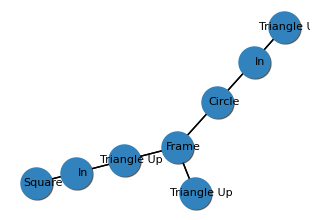

In [11]:
### Sixth representation
dataset = BongardDataset(root='ValKlog')
graph = dataset[0]
vis_graph(graph)
print(graph.x)
print(torch.any(graph.edge_attr))

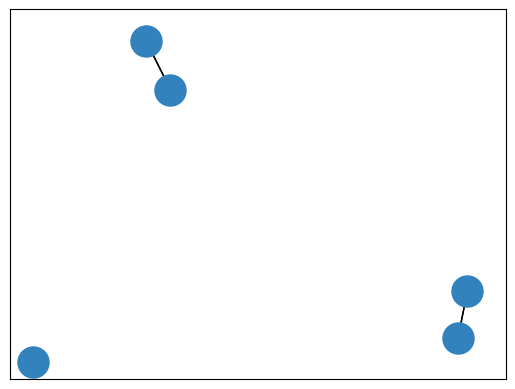

In [6]:
### Seventh representation
dataset = BongardDataset(root='NoFrame')
graph = dataset[0]
G = to_networkx(graph)
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G,pos,node_size=500,node_color="#3182bd", linewidths=1)
nx.draw_networkx_edges(G,pos,arrows=False)

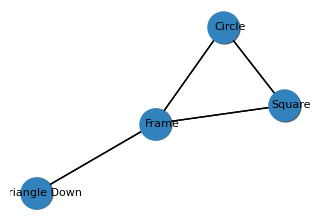

In [11]:
### eigth representation ###
dataset = BongardDataset(root='NodesOnly')
graph = dataset[50]
vis_graph(graph)

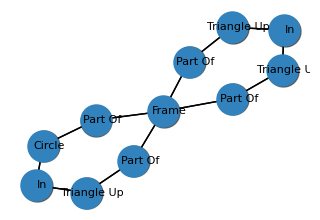

In [19]:
### ninth representation ###
dataset = BongardDataset(root='CorrectKlog')
graph = dataset[10]
vis_graph(graph)
